In [1]:
import pandas as pd

# Загружаем CSV-файл
df = pd.read_csv("country_vaccinations.csv")

# Смотрим первые 5 строк
df.head()


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [2]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [3]:
# Заполним пропуски в числовых колонках средними значениями
df['daily_vaccinations'] = df['daily_vaccinations'].fillna(df['daily_vaccinations'].mean())

# Удалим строки, где нет даты или страны
df = df.dropna(subset=['country', 'date'])


In [4]:
# Какие страны участвуют?
print(df['country'].unique())

# Сколько всего вакцин использовалось?
print(df['vaccines'].unique())


['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'England' 'Equatorial Guinea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Faeroe Islands' 'Falkland Islands' 'Fiji' 'Finland' 'France'
 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Gibraltar' 'Greece' 'Greenland' 'Grenada

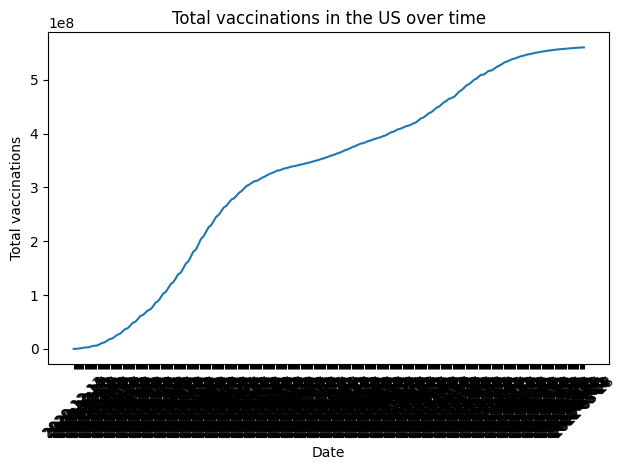

In [5]:
import matplotlib.pyplot as plt

# Пример: количество прививок по дням в США
usa_df = df[df['country'] == 'United States']

plt.plot(usa_df['date'], usa_df['total_vaccinations'])
plt.xticks(rotation=45)
plt.title('Total vaccinations in the US over time')
plt.xlabel('Date')
plt.ylabel('Total vaccinations')
plt.tight_layout()
plt.show()


In [6]:
# Только по одной стране
df_country = df[df['country'] == 'India'].copy()

# Преобразуем дату в числовой индекс
df_country['date'] = pd.to_datetime(df_country['date'])
df_country['day_num'] = (df_country['date'] - df_country['date'].min()).dt.days

# Удалим пропуски
df_country = df_country.dropna(subset=['daily_vaccinations'])

# Обучающая выборка
X = df_country[['day_num']]
y = df_country['daily_vaccinations']


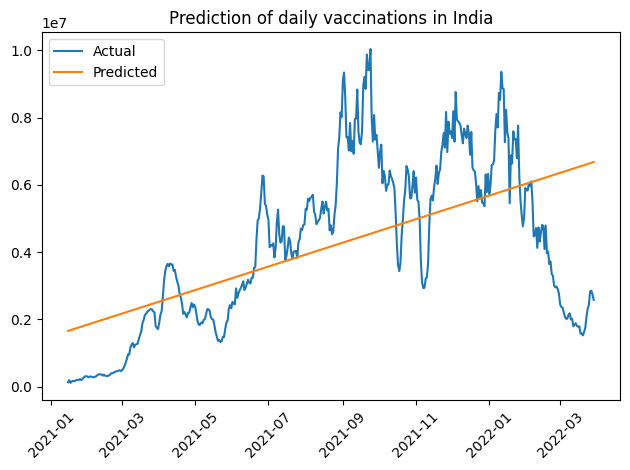

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

# Предскажем
df_country['predicted'] = model.predict(X)

# Визуализация
plt.plot(df_country['date'], df_country['daily_vaccinations'], label='Actual')
plt.plot(df_country['date'], df_country['predicted'], label='Predicted')
plt.legend()
plt.title('Prediction of daily vaccinations in India')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем данные
df = pd.read_csv("country_vaccinations.csv")

# Выбираем одну страну, например, Россия
country = "Russia"
df_country = df[df['country'] == country].copy()

# Преобразуем дату
df_country['date'] = pd.to_datetime(df_country['date'])

# Оставим только нужные столбцы
df_country = df_country[['date', 'daily_vaccinations']]

# Удалим пропуски
df_country = df_country.dropna()

# Сортировка по дате
df_country = df_country.sort_values('date')


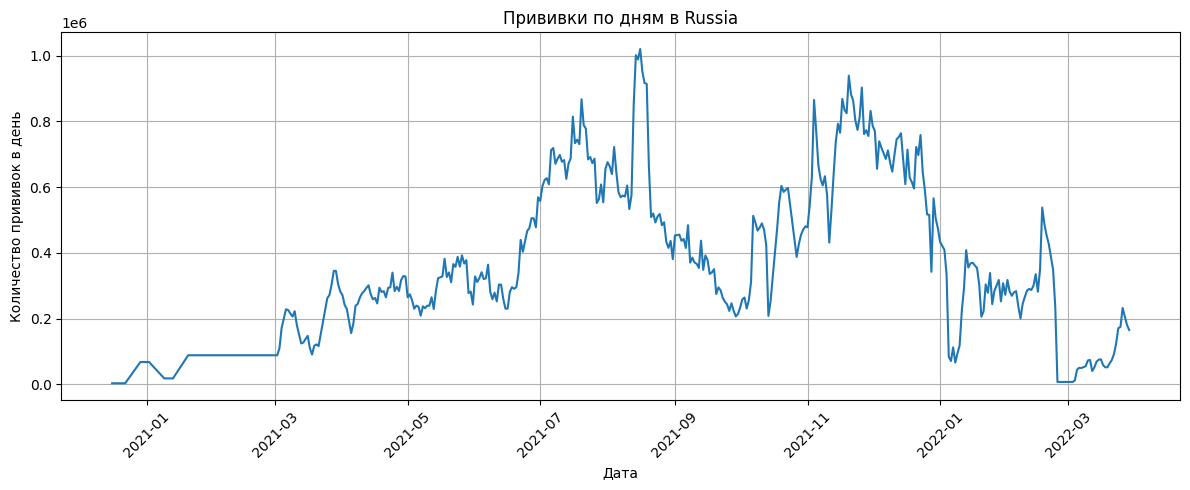

In [9]:
plt.figure(figsize=(12, 5))
plt.plot(df_country['date'], df_country['daily_vaccinations'])
plt.title(f'Прививки по дням в {country}')
plt.xlabel('Дата')
plt.ylabel('Количество прививок в день')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Преобразуем дату в число (день с начала вакцинации)
df_country['day_number'] = (df_country['date'] - df_country['date'].min()).dt.days

# Обучающая выборка
X = df_country[['day_number']]
y = df_country['daily_vaccinations']

# Обучаем модель
model = LinearRegression()
model.fit(X, y)


LinearRegression()

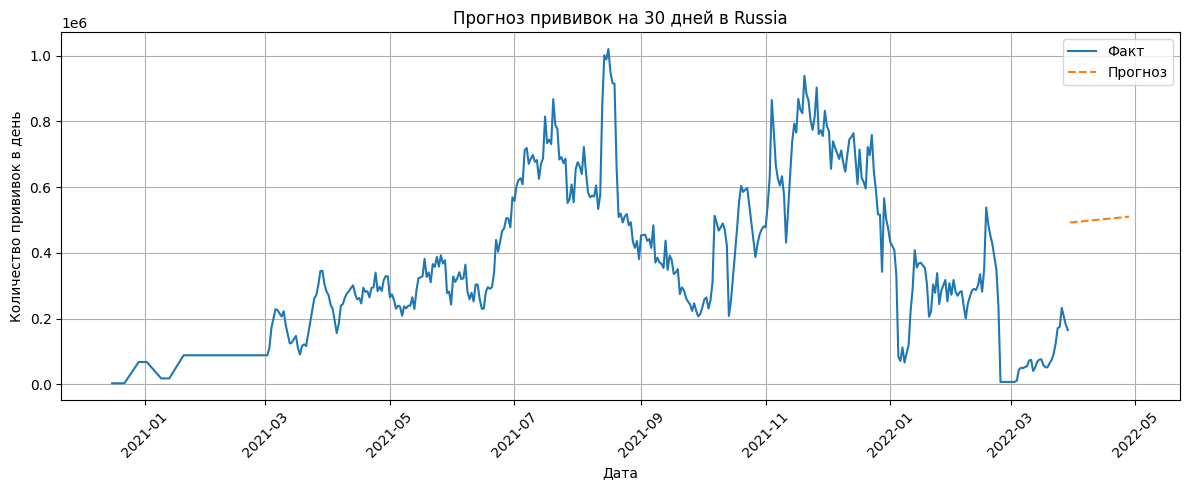

In [11]:
# Сделаем прогноз на 30 дней вперёд
future_days = 30
last_day = df_country['day_number'].max()

# Массив новых "дней"
future_X = pd.DataFrame({'day_number': np.arange(last_day + 1, last_day + future_days + 1)})

# Прогноз
future_preds = model.predict(future_X)

# Создаём даты для прогноза
future_dates = pd.date_range(start=df_country['date'].max() + pd.Timedelta(days=1), periods=future_days)

# Визуализация
plt.figure(figsize=(12, 5))
plt.plot(df_country['date'], df_country['daily_vaccinations'], label='Факт')
plt.plot(future_dates, future_preds, label='Прогноз', linestyle='--')
plt.title(f'Прогноз прививок на {future_days} дней в {country}')
plt.xlabel('Дата')
plt.ylabel('Количество прививок в день')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
pip install prophet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 3.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 3.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
from prophet import Prophet
import pandas as pd

# Загружаем данные
df = pd.read_csv("country_vaccinations.csv")
df['date'] = pd.to_datetime(df['date'])

# Берём данные по одной стране, например, India
country = "India"
df_country = df[df['country'] == country].copy()

# Удалим пропуски
df_country = df_country[['date', 'daily_vaccinations']].dropna()

# Переименуем столбцы под Prophet
df_prophet = df_country.rename(columns={'date': 'ds', 'daily_vaccinations': 'y'})

# Посмотрим
df_prophet.head()


,ds,y
35373,2021-01-16,191181.0
35374,2021-01-17,112150.0
35375,2021-01-18,151350.0
35376,2021-01-19,168709.0
35377,2021-01-20,161297.0


In [14]:
# Создаём модель
model = Prophet()

# Обучаем на наших данных
model.fit(df_prophet)


22:05:25 - cmdstanpy - INFO - Chain [1] start processing
22:05:26 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
# Создаём DataFrame с будущими датами
future = model.make_future_dataframe(periods=30)

# Делаем прогноз
forecast = model.predict(future)

# Смотрим результат
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
463,2022-04-24,1.321454e+06,-201807.792676,2.818377e+06
464,2022-04-25,1.275397e+06,-188035.569141,2.728235e+06
465,2022-04-26,1.228488e+06,-281976.708201,2.708906e+06
466,2022-04-27,1.184767e+06,-357752.704196,2.620768e+06
467,2022-04-28,1.142142e+06,-326302.202858,2.660989e+06


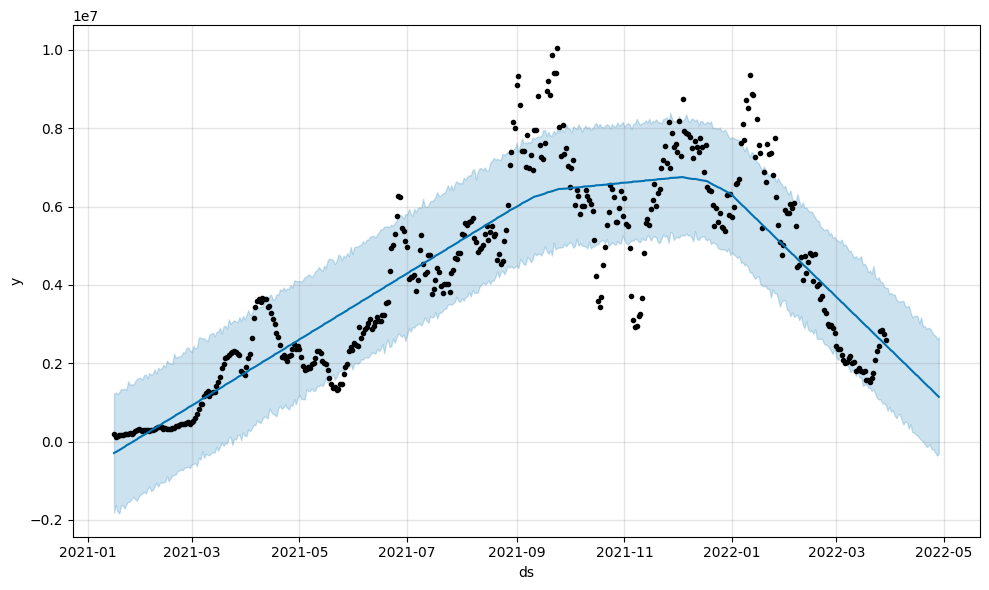

In [16]:
# График прогноза
fig = model.plot(forecast)


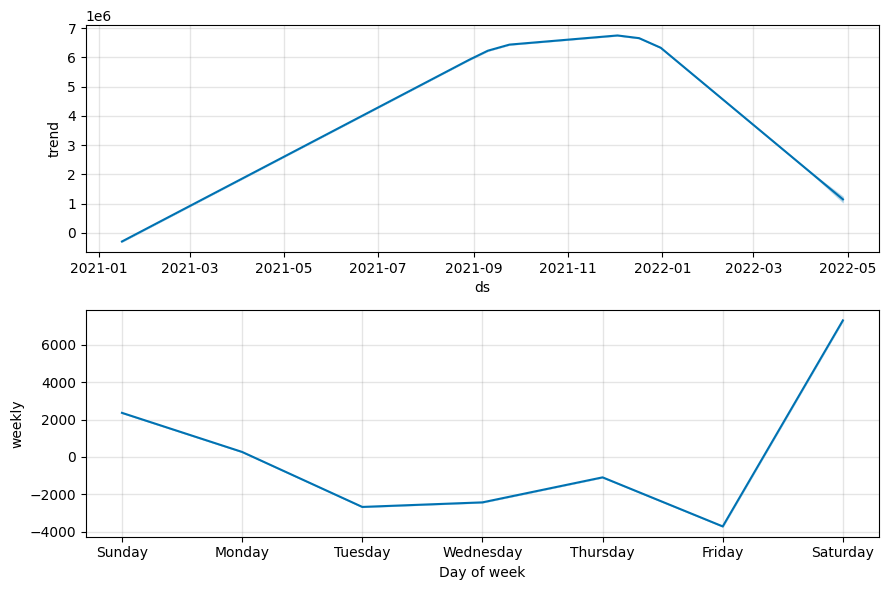

In [17]:
# Тренды и сезонности
fig2 = model.plot_components(forecast)


Кто начал раньше всех:
country
Norway          2020-12-02
Latvia          2020-12-04
Denmark         2020-12-08
United States   2020-12-13
Canada          2020-12-14
Russia          2020-12-15
China           2020-12-15
Israel          2020-12-19
Switzerland     2020-12-21
Liechtenstein   2020-12-21
Name: date, dtype: datetime64[ns]

Топ-10 по количеству вакцинаций:
country
China            3.263129e+09
India            1.834501e+09
United States    5.601818e+08
Brazil           4.135596e+08
Indonesia        3.771089e+08
Japan            2.543456e+08
Bangladesh       2.436427e+08
Pakistan         2.193686e+08
Vietnam          2.031444e+08
Mexico           1.919079e+08
Name: total_vaccinations, dtype: float64


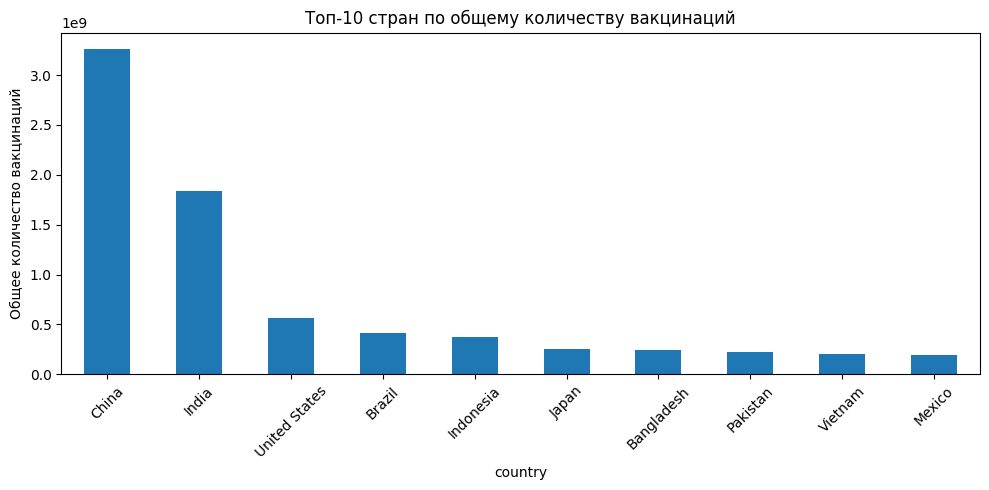

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем данные
df = pd.read_csv("country_vaccinations.csv")
df['date'] = pd.to_datetime(df['date'])

# Считаем первую дату начала вакцинации по каждой стране
first_vaccination = df.groupby('country')['date'].min().sort_values()

# Топ-10 стран по самой ранней дате старта
print("Кто начал раньше всех:")
print(first_vaccination.head(10))

# Суммарные прививки по странам
total_vaccinated = df.groupby('country')['total_vaccinations'].max().sort_values(ascending=False)

print("\nТоп-10 по количеству вакцинаций:")
print(total_vaccinated.head(10))

# Визуализация
total_vaccinated.head(10).plot(kind='bar', figsize=(10, 5), title='Топ-10 стран по общему количеству вакцинаций')
plt.ylabel('Общее количество вакцинаций')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


2025-07-05 22:08:53.316 
  command:

    streamlit run /opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-07-05 22:08:53.404 Session state does not function when running a script without `streamlit run`


DeltaGenerator()

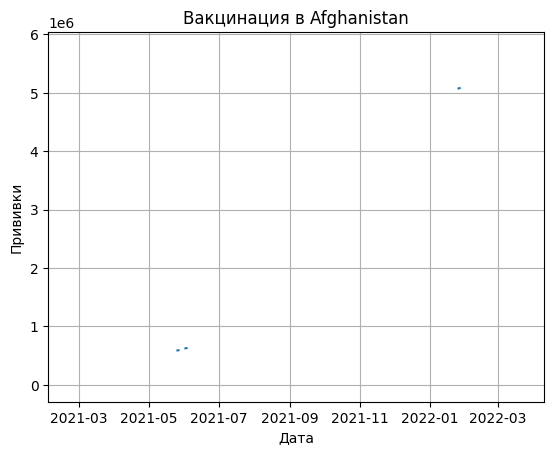

In [20]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

st.title("COVID-19 Вакцинация по странам")

# Загрузка данных
df = pd.read_csv("country_vaccinations.csv")
df['date'] = pd.to_datetime(df['date'])

# Список стран
countries = df['country'].unique()
selected_country = st.selectbox("Выберите страну", countries)

# Фильтрация по стране
country_df = df[df['country'] == selected_country]

# График вакцинации
fig, ax = plt.subplots()
ax.plot(country_df['date'], country_df['total_vaccinations'], label='Всего прививок')
ax.set_title(f'Вакцинация в {selected_country}')
ax.set_xlabel("Дата")
ax.set_ylabel("Прививки")
ax.grid(True)
st.pyplot(fig)


In [22]:
# app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

st.title("COVID-19 Вакцинация по странам")

df = pd.read_csv("country_vaccinations.csv")
df['date'] = pd.to_datetime(df['date'])

countries = df['country'].unique()
selected_country = st.selectbox("Выберите страну", countries)

country_df = df[df['country'] == selected_country]

fig, ax = plt.subplots()
ax.plot(country_df['date'], country_df['total_vaccinations'], label='Всего прививок')
ax.set_title(f'Вакцинация в {selected_country}')
ax.set_xlabel("Дата")
ax.set_ylabel("Прививки")
ax.grid(True)
st.pyplot(fig)


DeltaGenerator()